# Introduction to K means

K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into a predefined number of clusters. It is one of the most popular clustering algorithms due to its simplicity and effectiveness.


![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

# Import libraries and files 💾

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ID of the Google Sheet
sheet_id = "1u2aRXXwjNIc0MFcn-3jZCiXaxdYeRHvC15n7FCaaQWM"

# Title of the Google Sheet
sheet_name = "306097688"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"



# Create a Pandas DataFrame from the CSV data
spotify_df = pd.read_csv(url,
                       index_col="song_name",
                       nrows=11)


In [4]:
spotify_df

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_name,,,,,,,,,,,,,,,,
My Band,D12,851,849.00,1,-3.383,0,828.00,497.00,0.000002,116.00,844.00,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
The Real Slim Shady,Eminem,949,661.00,5,-4.244,0,572.00,302.00,0.000000,454.00,0.76,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Águas De Março,Antônio Carlos Jobim,642,339.00,3,-15.503,1,0.14,854.00,0.000000,105.00,491.00,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
The Girl From Ipanema,Stan Getz,641,0.14,8,-16.790,1,39.00,867.00,166.000000,105.00,388.00,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
"Paint It, Black",The Rolling Stones,464,795.00,1,-9.267,1,926.00,493.00,244.000000,399.00,612.00,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Sultans Of Swing,Dire Straits,733,794.00,5,-10.023,1,307.00,614.00,367.000000,0.33,931.00,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Space Raiders - Charlotte de Witte Remix,Eats Everything,749,731.00,4,-10.865,1,108.00,314.00,867.000000,111.00,598.00,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
In Silence,Amelie Lens,736,845.00,1,-12.017,1,377.00,548.00,901.000000,111.00,198.00,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,184,833.00,3,-33.503,1,519.00,989.00,596.000000,104.00,211.00,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [7]:
# Calculate the average score for each column
average_scores = spotify_df.mean(numeric_only=True)

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the columns from the sorted DataFrame
columns = sorted_columns[:13]

# Print the columns
columns

,0
duration_ms,287493.8000
danceability,633.6000
energy,629.8140
acousticness,547.8990
valence,434.4760
instrumentalness,405.4000
speechiness,404.0140
liveness,161.7330
tempo,118.7160
time_signature,3.9000


In [8]:
# Calculate the average score for each column
average_scores = spotify_df.mean(numeric_only=True)

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
top_3_columns = sorted_columns[:3]

# Print the top 3 columns
top_3_columns

,0
duration_ms,287493.800
danceability,633.600
energy,629.814


# Clustering in 2 dimensions ➡️
Two dimensions are chosen for visualisation purposes, as clustering results can be effectively plotted on a graph to understand how data points are grouped. While the core K-Means algorithm works for any number of dimensions, visualizing high-dimensional clusters becomes impossible. We will explore the two-dimensional case to gain a foundational understanding before tackling clustering in datasets with more features.

First, we create a small copy of our original dataframe with only 2 dimensions.

Dataframe columns are called dimensions, features, and sometimes just columns. It's helpful to be comfortable with these interchangeable terms.

In [34]:
two_features_df = spotify_df[['artist', 'danceability', 'energy']].copy()
spot_df = two_features_df[['danceability', 'energy']]
spot_df

,danceability,energy
song_name,,
My Band,851,849.00
The Real Slim Shady,949,661.00
Águas De Março,642,339.00
The Girl From Ipanema,641,0.14
"Paint It, Black",464,795.00
Sultans Of Swing,733,794.00
Space Raiders - Charlotte de Witte Remix,749,731.00
In Silence,736,845.00
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",184,833.00


Now we will .fit() the k-means model to our data.

.fit() performs a lot of calculations and stores the data in the given variable. It does not change our original dataframe, but uses the data from it.

In [ ]:
# This cell is only run on Windows to avoid a memory leak caused by the sklearn library

# import os
# os.environ["OMP_NUM_THREADS"]="1"

In [35]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(spot_df.fillna(value=0))
#.fillna(value=0): replaces any missing values (NaNs) in the features DataFrame with 0. The .fillna() method is part of Pandas and operates on DataFrames or Series.



KMeans(n_clusters=5, random_state=123)

# Visualisation of data points and clusters

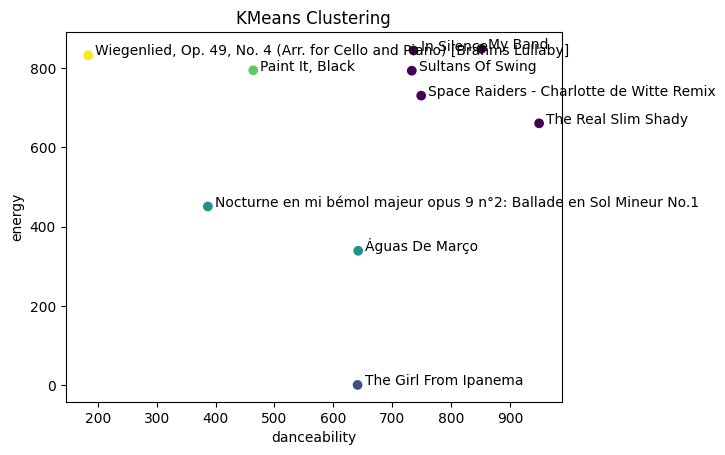

In [37]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = spot_df.iloc[:, 0],
            y = spot_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in spot_df.iterrows():
    plt.annotate(idx, (row["danceability"], row["energy"]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(spot_df.columns[0])
plt.ylabel(spot_df.columns[1])

# Display the plot
plt.show()

# Clusters and centroids

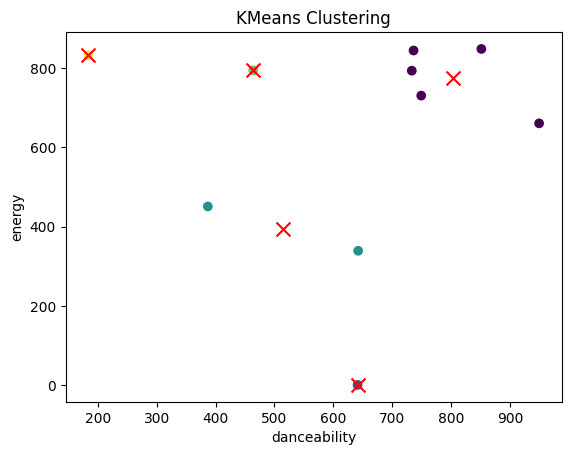

In [38]:
# @title Clusters and centroids

# Plot the data points
plt.scatter(x = spot_df.iloc[:, 0],
            y = spot_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Plot the cluster centers
plt.scatter(x = my_2d_kmeans.cluster_centers_[:, 0],
            y = my_2d_kmeans.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(spot_df.columns[0])
plt.ylabel(spot_df.columns[1])

# Display the plot
plt.show()

# If we label all the data points, our visualisation will become cluttered.
lets explore now the data to see which is next to each other

In [39]:
# obtain the cluster output
categorized = my_2d_kmeans.labels_

# attach the cluster output to our original DataFrame
spot_df["categorized"] = categorized

spot_df.sort_values(by="categorized")

,danceability,energy,categorized
song_name,,,
My Band,851,849.00,0
The Real Slim Shady,949,661.00,0
Sultans Of Swing,733,794.00,0
Space Raiders - Charlotte de Witte Remix,749,731.00,0
In Silence,736,845.00,0
The Girl From Ipanema,641,0.14,1
Águas De Março,642,339.00,2
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,387,451.00,2
"Paint It, Black",464,795.00,3


# How does k-means find the centroids ❌
K-means clustering is an iterative algorithm that tries to partition a dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The algorithm minimises the distance between data points within a cluster and maximises the distance between data points in different clusters.

Steps:

Specify the number of clusters, K.
Select K points at random to act as the centroids of the clusters.
Assign each data point to the closest centroid.
Compute new centroids for each cluster by moving the centroid to the center of the data points assigned to that cluster.
Repeat steps 3 and 4 until the centroids no longer change.
[This website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is great for showing how k-means clusters and re-clusters. Please take a look and play around.

# Clustering in multiple dimensions 🔀
Having explored K-Means clustering in two dimensions for visual clarity, let's now tackle the more general scenario: high-dimensional data. Here, the intuitive plotting techniques used in two dimensions become impractical.

In [47]:
# Drop non-numeric columns and prepare data for clustering
cluster_data = spotify_df.select_dtypes(include=['number']).copy()

# Fill missing values
cluster_data = cluster_data.fillna(value=0)

# Initialize the KMeans model
from sklearn.cluster import KMeans
random_seed = 123
my_full_kmeans = KMeans(n_clusters=5, random_state=random_seed)

# Fit the KMeans model to the numeric data
my_full_kmeans.fit(cluster_data)

# Attach the cluster output to the original DataFrame
spotify_df["categorized"] = my_full_kmeans.labels_

# Sort the DataFrame by the cluster labels
spotify_df.sort_values(by="categorized")



,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,categorized
song_name,,,,,,,,,,,,,,,,,
Space Raiders - Charlotte de Witte Remix,Eats Everything,749,731.00,4,-10.865,1,108.00,314.00,867.000000,111.00,598.00,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqgHqWQiYm,0
In Silence,Amelie Lens,736,845.00,1,-12.017,1,377.00,548.00,901.000000,111.00,198.00,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwxt22Wx7b,0
Águas De Março,Antônio Carlos Jobim,642,339.00,3,-15.503,1,0.14,854.00,0.000000,105.00,491.00,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXAmUM77YG,1
"Paint It, Black",The Rolling Stones,464,795.00,1,-9.267,1,926.00,493.00,244.000000,399.00,612.00,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8VzG6JE8,1
The Girl From Ipanema,Stan Getz,641,0.14,8,-16.790,1,39.00,867.00,166.000000,105.00,388.00,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYet6547e5,2
Sultans Of Swing,Dire Straits,733,794.00,5,-10.023,1,307.00,614.00,367.000000,0.33,931.00,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80OjWqEBQ,2
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,184,833.00,3,-33.503,1,519.00,989.00,596.000000,104.00,211.00,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwydl1pullI,3
My Band,D12,851,849.00,1,-3.383,0,828.00,497.00,0.000002,116.00,844.00,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBUW1VvmsL,4
The Real Slim Shady,Eminem,949,661.00,5,-4.244,0,572.00,302.00,0.000000,454.00,0.76,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM4PmlwIR,4
